<a href="https://colab.research.google.com/github/scopophobic/ML-AMAZON-CHALLENEGE/blob/main/amazon_ml_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Basic library imports

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [1]:
import os
import pandas as pd

### Read Dataset

In [7]:
# DATASET_FOLDER = '/content'
DATASET_FOLDER = '/content/dataset'
train = pd.read_csv(os.path.join(DATASET_FOLDER, 'train.csv'))
test = pd.read_csv(os.path.join(DATASET_FOLDER, 'test.csv'))
sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test.csv'))
# sample_test = pd.read_csv(os.path.join(DATASET_FOLDER, 'prediction-train-new.csv'))
sample_test_out = pd.read_csv(os.path.join(DATASET_FOLDER, 'sample_test_out.csv'))

In [8]:
sample_test_cleaned = sample_test[sample_test['image_link'].notna() & (sample_test['image_link'] != '')]
sample_test_cleaned.count()

,0
index,88
image_link,88
group_id,88
entity_name,88


### Run Sanity check using src/sanity.py

In [9]:
!python sanity.py --test_filename /content/prediction-test.csv --output_filename /content/prediction-test-out.csv

Error: Filepath: /content/prediction-test.csv invalid or not found.


In [ ]:
# !python sanity.py --test_filename /content/dataset/sample_test.csv --output_filename /content/dataset/sample_test_out_fail.csv

Error: Filepath: /content/dataset/sample_test.csv invalid or not found.


### Download images

In [10]:
from utils import download_images
# download_images(sample_test['image_link'], '/content/alt-images')
download_images(sample_test['image_link'], '/content/images')

100%|██████████| 88/88 [00:00<00:00, 91.61it/s]


In [11]:
# print(len(os.listdir('/content/alt-images')))
print(len(os.listdir('/content/images')))

54


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# rm -rf /content/images

### Text Extraction from image

In [12]:
!pip install pytesseract
!apt-get update
!apt-get install -y tesseract-ocr

Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Get:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:10 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [3,030 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,575 kB]
Hit:13 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:14 http://arc

In [13]:
import pytesseract
from PIL import Image

In [14]:
IMAGE_DIR = '/content/images'

extracted_data = []


for index, image in enumerate(os.listdir(IMAGE_DIR)):
  # if image.endswith(('.jpg')):
  image_path = os.path.join(IMAGE_DIR,image)

  img = Image.open(image_path)

  extracted_text = pytesseract.image_to_string(img)

  extracted_data.append({'image_name': image, 'entity_name': sample_test['entity_name'][index], 'group_id': sample_test['group_id'][index], 'extracted_text': extracted_text})

df = pd.DataFrame(extracted_data)
output_csv = '/content/extracted_text.csv'
df.to_csv(output_csv, index=False)

##### read extracted data from image

In [ ]:
from google.colab import files
files.download('/content/extracted_text.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:

df = pd.read_csv('/content/extracted_text.csv')
df.tail()

,image_name,entity_name,group_id,extracted_text
49,614hn5uX9MS.jpg,wattage,860821,Extra 10FT Long Cord\n\n \n
50,51oaOP8qJlL.jpg,voltage,860821,\n\n \n
51,71UYDq4nfnL.jpg,wattage,124643,40LB .\nLARGE\nCAPACITY\n\no\nee ae\n\nFast Ic...
52,510xYFNYQ8L.jpg,width,311997,Width\n1C.M.\n\n \n\nLength\n\n9 Meter\n
53,41uwo4PVnuL.jpg,width,200507,\n\n“oz\n\n \n


### Second Approach With PreProcessing

In [ ]:
!pip install pytesseract
!apt-get update
!apt-get install -y tesseract-ocr

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Ign:4 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:8 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Hit:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Fetched 257 kB in 1s (173 kB/s)
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to pro

In [15]:
pip install deskew

In [16]:
import os
import cv2
import numpy as np
from PIL import Image
import pytesseract
import pandas as pd
from scipy import ndimage
from skimage import io
from skimage.transform import rotate
from skimage.color import rgb2gray
from deskew import determine_skew

In [17]:

def deskew(image):
    grayscale = rgb2gray(image)
    angle = determine_skew(grayscale)
    rotated = rotate(image, angle, resize=True) * 255
    return rotated.astype(np.uint8)

In [18]:
def preprocess_image(image):
    try:
        # Attempt to preprocess the image
        corrected = deskew(image)
        gray = cv2.cvtColor(corrected, cv2.COLOR_BGR2GRAY)
        gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

        # Dilation, erosion, and median blur to remove some noise
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
        gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=1)
        gray = cv2.medianBlur(gray, 3)

        return gray

    except Exception as e:
        # Log the error and return the original image
        print(f"Error in preprocess_image: {e}")
        return image


# def preprocess_image(image):
#     try:
#         # Check if the image is None before processing
#         if image is None:
#             raise ValueError("Invalid image. The image is None.")

#         corrected = deskew(image)  # Add error handling around deskew if necessary
#         gray = cv2.cvtColor(corrected, cv2.COLOR_BGR2GRAY)
#         gray = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

#         # Dilation, erosion and median blur to remove some noise
#         kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
#         gray = cv2.morphologyEx(gray, cv2.MORPH_OPEN, kernel, iterations=1)
#         gray = cv2.medianBlur(gray, 3)

#         return gray
#     except Exception as e:
#         print(f"Error in preprocess_image: {e}")
#         return None

In [19]:
IMAGE_DIR = '/content/images'
# IMAGE_DIR = '/content/alt-images'
extracted_data = []
output_img = []

for index, image in enumerate(os.listdir(IMAGE_DIR)):
  if image.endswith(('.jpg')):
    image_path = os.path.join(IMAGE_DIR,image)
    img = cv2.imread(image_path)
    print(index, image_path)
    preprocessed_img = preprocess_image(img)
    if (sample_test['group_id'][index] == 658003):
      output_img.append(preprocessed_img)
    custom_config = r'--oem 3 --psm 6 -c tessedit_char_whitelist=ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz0123456789'
    extracted_text = pytesseract.image_to_string(preprocessed_img, config=custom_config)
    # extracted_text = pytesseract.image_to_string(preprocessed_img)

    # Remove non-ASCII characters & extra whitespace
    extracted_text = ''.join(char for char in extracted_text if ord(char) < 128)
    extracted_text = ' '.join(extracted_text.split())

    extracted_data.append({
      'image_link': 'https://m.media-amazon.com/images/I/' + image,
      'image_name': image,
      'entity_name': sample_test['entity_name'][index],
      'group_id': sample_test['group_id'][index],
      'extracted_text': extracted_text,
      # 'entity_value': sample_test['entity_value'][index]
    })

df = pd.DataFrame(extracted_data)
# output_csv = '/content/extracted_text.csv'
output_csv = '/content/extracted_text-alt.csv'
df.to_csv(output_csv, index=False)

0 /content/images/51P0IuT6RsL.jpg
1 /content/images/41-NCxNuBxL.jpg
2 /content/images/71Qk6hR9-WL.jpg
3 /content/images/51Su6zXkAsL.jpg
4 /content/images/514pScQdlCL.jpg
5 /content/images/514bY8c4ZIL.jpg
6 /content/images/61lX6IP1SVL.jpg
7 /content/images/71ta6wY3HtL.jpg
8 /content/images/51tEop-EBJL.jpg
9 /content/images/51BEuVR4ZzL.jpg
10 /content/images/61O+Yi09tyL.jpg
11 /content/images/61C+fwVD6dL.jpg
12 /content/images/81IYdOV0mVL.jpg
13 /content/images/51r7U52rh7L.jpg
14 /content/images/615Cjzm6pyL.jpg
15 /content/images/71afEPoRGsL.jpg
16 /content/images/71fWddA0+yL.jpg
17 /content/images/61E2XRNSdYL.jpg
18 /content/images/51y79cwGJFL.jpg
19 /content/images/81PG3ea0MOL.jpg
20 /content/images/81qUmRUUTTL.jpg
21 /content/images/51cPZYLk2YL.jpg
22 /content/images/81aZ2ozp1GL.jpg
23 /content/images/51H+mX2Wk7L.jpg
24 /content/images/51FSlaVlejL.jpg
25 /content/images/71UN1IxKp4L.jpg
26 /content/images/51KykmLgc0L.jpg
27 /content/images/51+oHGvSvuL.jpg
28 /content/images/41ADVPQgZOL

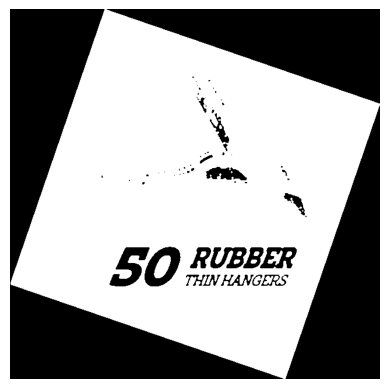

In [24]:
import matplotlib.pyplot as plt
img_rgb = cv2.cvtColor(output_img[0], cv2.COLOR_BGR2RGB)

plt.imshow(img_rgb)
plt.axis('off')  # Hide axis for better visualization
plt.show()


##### read extracted data from image

In [23]:
df.head()

,image_link,image_name,entity_name,group_id,extracted_text
0,https://m.media-amazon.com/images/I/51P0IuT6Rs...,51P0IuT6RsL.jpg,width,658003,a my 5ORrEree
1,https://m.media-amazon.com/images/I/41-NCxNuBx...,41-NCxNuBxL.jpg,depth,658003,20CM pe
2,https://m.media-amazon.com/images/I/71Qk6hR9-W...,71Qk6hR9-WL.jpg,maximum_weight_recommendation,939426,80PLUS 80 CERTIFICATE PLUS LONGCONNECTOR aya P...
3,https://m.media-amazon.com/images/I/51Su6zXkAs...,51Su6zXkAsL.jpg,voltage,276700,58114cm t So XIKIS al ae ritBrreHel ao
4,https://m.media-amazon.com/images/I/514pScQdlC...,514pScQdlCL.jpg,wattage,276700,


In [25]:
df = pd.read_csv('/content/extracted_text-alt.csv')
result_df = sample_test.merge(df[['image_link', 'extracted_text']],
                              on='image_link',
                              how='left')
result_csv = '/content/prediction.csv'
result_df.to_csv(result_csv, index=False)
print(f'shape of the result_df: {result_df.shape}')
result_df.tail()

shape of the result_df: (88, 5)


,index,image_link,group_id,entity_name,extracted_text
83,83,https://m.media-amazon.com/images/I/81IYdOV0mV...,721522,maximum_weight_recommendation,77RuedamannApplicabletomultipleequipment Wheel...
84,84,https://m.media-amazon.com/images/I/81PG3ea0MO...,240413,voltage,t e C ty ec eer i ES PH 4 od lc 7 e vf i aN VW...
85,85,https://m.media-amazon.com/images/I/81aZ2ozp1G...,805279,maximum_weight_recommendation,4 y500LBSg S a
86,86,https://m.media-amazon.com/images/I/81qUmRUUTT...,603688,maximum_weight_recommendation,ENJOYSLEDDINGFUN WITHYOURFAMILIESSFRIENDS 2 Aa...
87,87,https://m.media-amazon.com/images/I/81qUmRUUTT...,603688,item_weight,ENJOYSLEDDINGFUN WITHYOURFAMILIESSFRIENDS 2 Aa...


## Prediction

In [26]:
import torch
import torch.nn as nn
from transformers import AutoModel, AutoTokenizer, AdamW
from torch.utils.data import Dataset, DataLoader
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

In [27]:
class EntityValueExtractor(nn.Module):
    def __init__(self, model_name="bert-base-uncased", num_entities=8):
        super().__init__()
        self.transformer = AutoModel.from_pretrained(model_name)
        self.entity_classifier = nn.Linear(self.transformer.config.hidden_size, num_entities)
        self.value_extractors = nn.ModuleList([
            nn.Linear(self.transformer.config.hidden_size, 1) for _ in range(num_entities)
        ])

    def forward(self, input_ids, attention_mask):
        outputs = self.transformer(input_ids=input_ids, attention_mask=attention_mask)
        pooled_output = outputs.pooler_output

        entity_logits = self.entity_classifier(pooled_output)

        value_predictions = []
        for extractor in self.value_extractors:
            value_predictions.append(extractor(pooled_output))

        return entity_logits, torch.cat(value_predictions, dim=1)


In [29]:
class EntityValueDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_length=128):
        self.data = dataframe
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['extracted_text']
        entity = self.data.iloc[idx]['entity_name']
        value = self.data.iloc[idx]['entity_value']

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            max_length=self.max_length,
            return_token_type_ids=False,
            padding='max_length',
            truncation=True,
            return_attention_mask=True,
            return_tensors='pt',
        )

        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'entity': torch.tensor(self.entity_to_id[entity], dtype=torch.long),
            'value': torch.tensor(value, dtype=torch.float)
        }


In [30]:
# Assuming you have your data in a CSV file named 'entity_value_data.csv'
df = pd.read_csv('prediction.csv')

# Create a mapping of entity names to IDs
entity_to_id = {entity: idx for idx, entity in enumerate(df['entity_name'].unique())}
id_to_entity = {idx: entity for entity, idx in entity_to_id.items()}

In [31]:
model_name = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = EntityValueExtractor(model_name, num_entities=len(entity_to_id))

dataset = EntityValueDataset(df, tokenizer)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [32]:
def train_model(model, dataloader, num_epochs=5, lr=2e-5):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    optimizer = AdamW(model.parameters(), lr=lr)
    entity_criterion = nn.CrossEntropyLoss()
    value_criterion = nn.MSELoss()

    for epoch in range(num_epochs):
        model.train()
        total_loss = 0

        for batch in tqdm(dataloader, desc=f'Epoch {epoch + 1}/{num_epochs}'):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            entity_labels = batch['entity'].to(device)
            value_labels = batch['value'].to(device)

            optimizer.zero_grad()

            entity_logits, value_preds = model(input_ids, attention_mask)

            entity_loss = entity_criterion(entity_logits, entity_labels)
            value_loss = value_criterion(value_preds, value_labels)

            loss = entity_loss + value_loss
            total_loss += loss.item()

            loss.backward()
            optimizer.step()

        avg_loss = total_loss / len(dataloader)
        print(f'Epoch {epoch + 1}/{num_epochs}, Average Loss: {avg_loss:.4f}')


In [33]:
train_model(model, dataloader)

/usr/local/lib/python3.10/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/5:   0%|          | 0/3 [00:00<?, ?it/s]

KeyError: 'entity_value'

In [34]:
def predict(model, text, tokenizer):
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)
    model.eval()

    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True).to(device)

    with torch.no_grad():
        entity_logits, value_preds = model(**inputs)

    entity_pred = torch.argmax(entity_logits, dim=1)
    value_pred = value_preds[0, entity_pred]

    return id_to_entity[entity_pred.item()], value_pred.item()

In [35]:
test_texts = [
    "The width of the product is 20 cm",
    "This item weighs approximately 5 kg",
    "The voltage rating is 220V",
]

for text in test_texts:
    entity, value = predict(model, text, tokenizer)
    print(f"Text: {text}")
    print(f"Predicted entity: {entity}, Predicted value: {value:.2f}")
    print()


TypeError: EntityValueExtractor.forward() got an unexpected keyword argument 'token_type_ids'

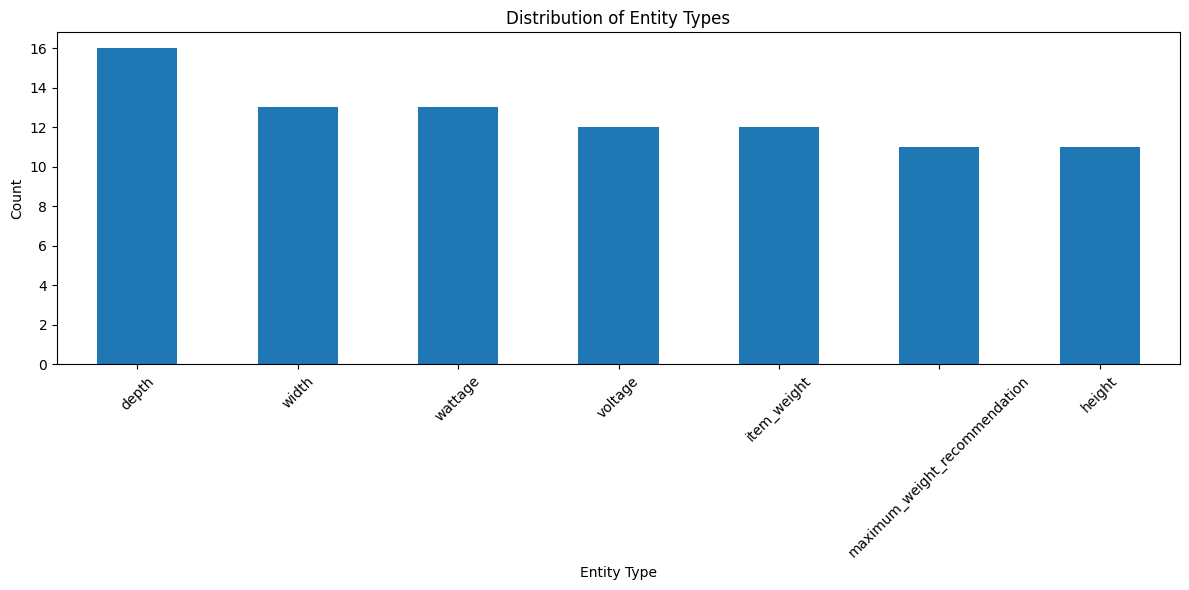

In [36]:
plt.figure(figsize=(12, 6))
df['entity_name'].value_counts().plot(kind='bar')
plt.title('Distribution of Entity Types')
plt.xlabel('Entity Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()